## Red Pass Green Pass Tester

Testing of trained model on unseen data. As the trained model cannot be pushed onto GitHub, you will have to train the model locally at least once, and it will be saved to your local machine

In [1]:
import os
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import models
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


### Read and format testing images to correct input format
- Formatter from ImageFormatter Notebook

In [2]:
def format_images(input_folder, new_horz, new_vert, output_folder):
    image_number = 1
    for filename in os.listdir(input_folder):
        image_path = input_folder + '/' + filename
        print('Reading image: ' + image_path)
        img = Image.open(image_path)
        # Resize image
        resized_image = img.resize((new_horz, new_vert))
        rgb_image =  resized_image.convert('RGB')
        new_image_name = output_folder + str(image_number) + '.jpg'
        print('Saving image to ' + new_image_name)
        rgb_image.save(new_image_name, 'JPEG')
        image_number += 1
    print('Done!')

In [3]:
# Images need to be formatted to correct size before testing
format_images(input_folder="./TestImages", new_horz=720, new_vert=1280, output_folder="./ProcessedTestImages/")

Reading image: ./TestImages/Screenshot 2022-03-20 161952.png
Saving image to ./ProcessedTestImages/1.jpg
Reading image: ./TestImages/Screenshot 2022-03-20 162022.png
Saving image to ./ProcessedTestImages/2.jpg
Reading image: ./TestImages/Screenshot 2022-03-20 162058.png
Saving image to ./ProcessedTestImages/3.jpg
Reading image: ./TestImages/Screenshot 2022-03-20 162139.png
Saving image to ./ProcessedTestImages/4.jpg
Reading image: ./TestImages/Screenshot 2022-03-20 162355.png
Saving image to ./ProcessedTestImages/5.jpg
Reading image: ./TestImages/Screenshot 2022-03-20 162759.png
Saving image to ./ProcessedTestImages/6.jpg
Reading image: ./TestImages/strawberry.jpg
Saving image to ./ProcessedTestImages/7.jpg
Reading image: ./TestImages/TennisBall.jpg
Saving image to ./ProcessedTestImages/8.jpg
Done!


In [4]:
# https://stackoverflow.com/questions/28816046/
# Display image inline
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

### Test the Model with input Image
- Note: Image has to be in jpg format and size inline with what was trained on

In [5]:
def test_model(image_path, model):
    classes = ['Red', 'Green']
    # Reads in BGR, need convert to RGB
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    prediction =  model.predict(np.array([img]))
    return classes[np.argmax(prediction)]


In [6]:
# Load the model in
model = models.load_model('GreenRedClassifier.model')

Red


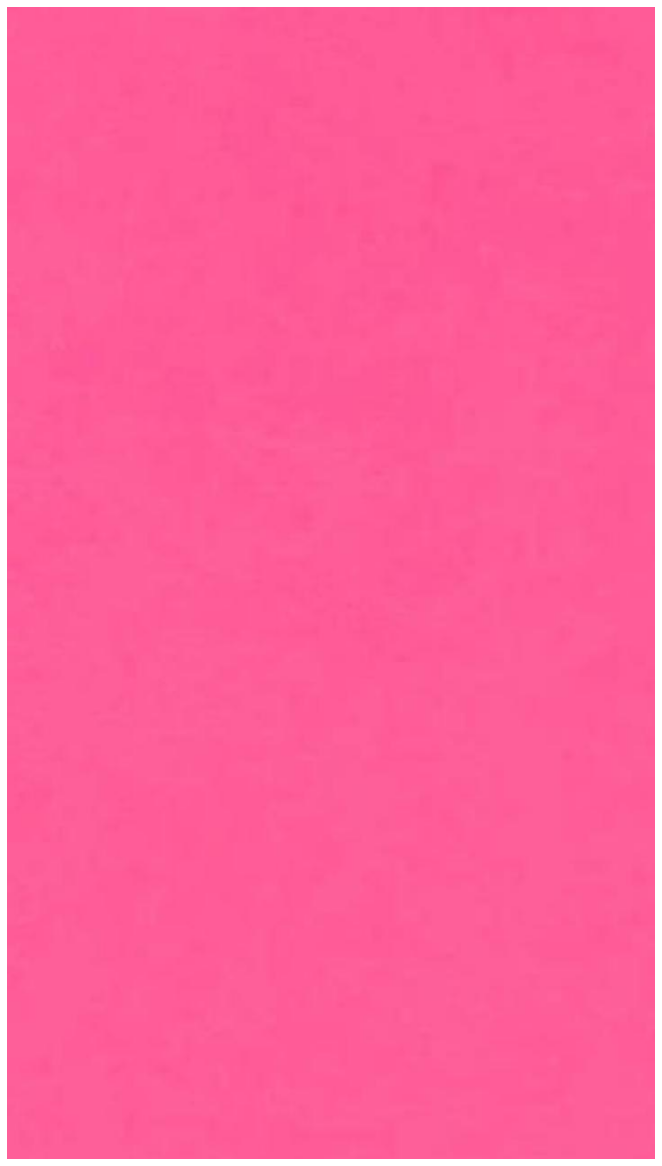

In [12]:
# Set the path to the processed image you want to test
image_path = './ProcessedTestImages/6.jpg'
prediction = test_model(image_path, model)
print(prediction)
display(image_path)